# Demo: acMark

In [1]:
import acmark_model as acmark
import numpy as np

In [2]:
z=12
n=2**z
m=2**(z+5)
max_deg = 500
k=6
d=4

M = np.array([
    [0.6, 0.08, 0.08, 0.08, 0.08, 0.08],
    [0.08, 0.6, 0.08, 0.08, 0.08, 0.08],
    [0.08, 0.08, 0.6, 0.08, 0.08, 0.08],
    [0.08, 0.08, 0.08, 0.6, 0.08, 0.08],
    [0.08, 0.08, 0.08, 0.08, 0.6, 0.08],
    [0.08, 0.08, 0.08, 0.08, 0.08, 0.6]
])
            
D = np.array([
    [0.2, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.1, 0.2, 0.1, 0.1, 0.1, 0.1],
    [0.1, 0.1, 0.25, 0.1, 0.1, 0.1],
    [0.1, 0.1, 0.1, 0.25, 0.1, 0.1],
    [0.1, 0.1, 0.1, 0.1, 0.3, 0.1],
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.3]
])

In [3]:
S,X,Label = acmark.acmark(n,m,k,d,max_deg,M,D)

class size disribution : [695, 728, 680, 629, 645, 719]
finished 10%
finished 20%
finished 30%
finished 40%
finished 50%
finished 60%
finished 70%
finished 80%
finished 90%
number of generated edges : 124135


## Class preference matrix of generated graph

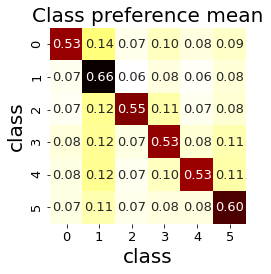

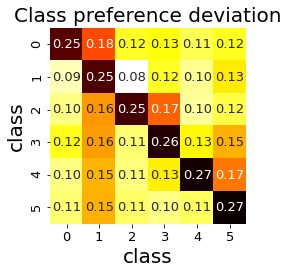

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from func import calc_class_features
class_pref_mean, class_pref_dev = calc_class_features(S,k,Label)

plt.rcParams["font.size"] = 13
# plt.title(file_name[11:-4]+"_CP", fontsize=20)
plt.title("Class preference mean", fontsize=20)
hm = sns.heatmap(class_pref_mean,annot=True, cmap='hot_r', fmt="1.2f", cbar=False, square=True)
plt.xlabel("class",size=20)
plt.ylabel("class",size=20)
plt.tight_layout()
# plt.savefig("acmark_cpm.png", format="png", dpi=300)
plt.show()
plt.rcParams["font.size"] = 13
# plt.title(file_name[11:-4]+"_deviation", fontsize=20)
plt.title("Class preference deviation", fontsize=20)
hm = sns.heatmap(class_pref_dev,annot=True, cmap='hot_r', fmt="1.2f", cbar=False, square=True)
plt.xlabel("class",size=20)
plt.ylabel("class",size=20)
plt.tight_layout()
# plt.savefig("acmark_cpd.png", format="png", dpi=300)
plt.show()

## Attribute visualization

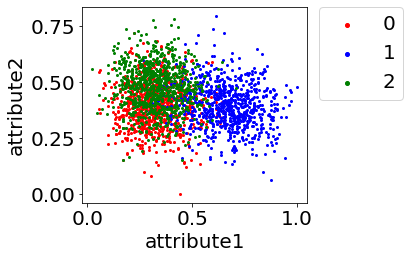

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.rcParams["font.size"] = 20
colors = ['red','blue','green','purple','gold','brown','c','m','k','plum','yellow','pink','maroon','teal','tomato']

partition = []
for i in range(k):
    partition.append([])
for i in range(len(C)):
    partition[C[i]].append(i)

count = 0
for i in partition:
    tmp_ver = []
    tmp_hor = []
    for j in i:
        tmp_ver.append(X[j,0])
        tmp_hor.append(X[j,1])
    ax.scatter(tmp_ver,tmp_hor, c=colors[count],label=count, s=4)
    count+=1
    if count == 3: # how many classes do you want to plot?
        break
        
plt.xlabel("attribute1")
plt.ylabel("attribute2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0. , markerscale=2., scatterpoints=1,)
plt.tight_layout()
plt.show()